In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [17]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame gamintoją, kainą, 
# pagaminimo datą, ridą, pavarų tipą, variklio informaciją. SQL užklausoje turite atmesti 
# tuos įrašus, kur rida nenurodyta, taip pat palikite tik nesikartojančius įrašus 
# (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()





In [ ]:
# SQl lentelė - InsuranceUSA7cols. Ar yra priklausoimybė tarp lyties, kūno masės indekso (bmi), 
# rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

# 1. lytis ok
# 2. bmi 
# 3. rukymas ok
# 4. amzius ok
# 5. Vaiku skaicius 



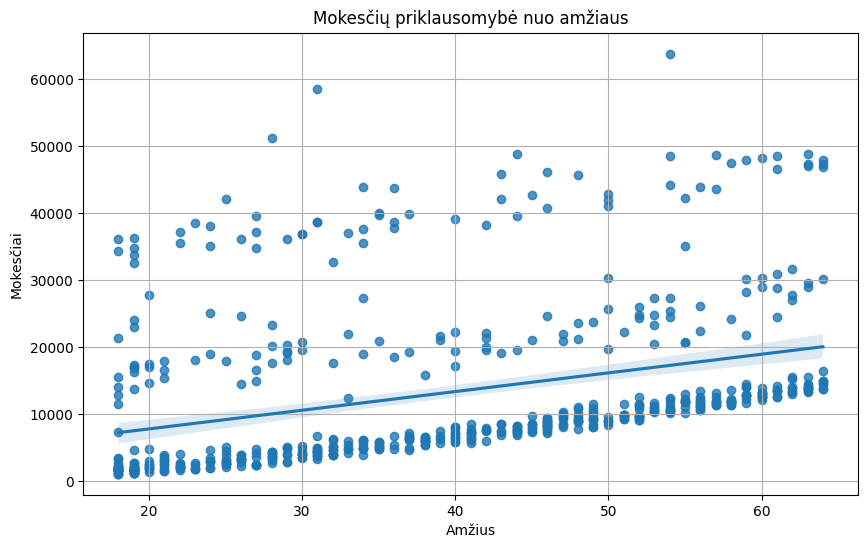

In [12]:
# Age
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()


# SQL užklausa per pandas sql_query
sql_auto = """SELECT age, charges FROM InsuranceUSA7cols;"""
df = pd.read_sql_query(sql_auto, con=DB)



plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df)
plt.xlabel('Amžius')
plt.ylabel('Mokesčiai')
plt.title('Mokesčių priklausomybė nuo amžiaus')
plt.grid(True)
plt.show()

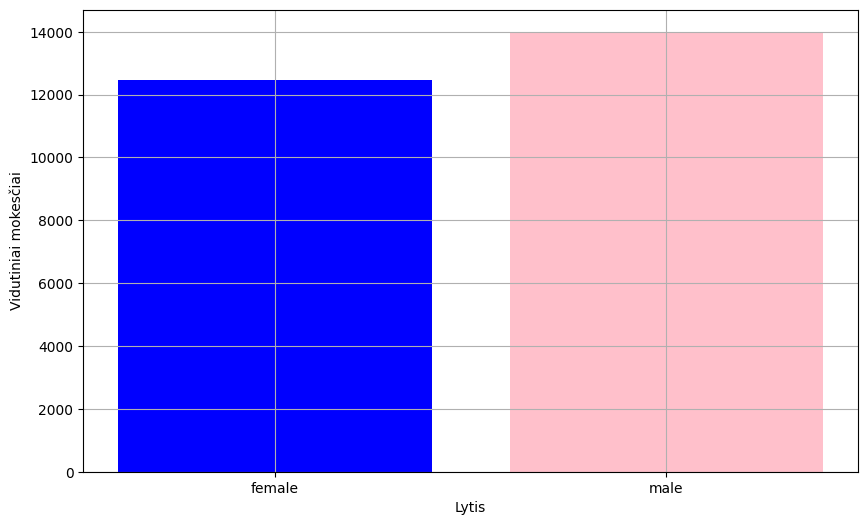

In [27]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

# SQL užklausa per pandas sql_query
sql_child = """SELECT sex, AVG(charges) AS average_charges FROM InsuranceUSA7cols GROUP BY sex;"""
df1 = pd.read_sql_query(sql_child, con=DB)

# Uždarome duomenų bazės ryšį
DB.close()

# Vizualizacija: Stulpelinė diagrama lyčių ir vidutinių mokesčių santykiui
plt.figure(figsize=(10, 6))
plt.bar(df1['sex'], df1['average_charges'], color=['blue', 'pink'])  # Spalvos vyrų ir moterų grupėms
plt.xlabel('Lytis')
plt.ylabel('Vidutiniai mokesčiai')
plt.grid(True)
plt.show()

      sex smoker       charges       group
0  female     no   9056.991075   female no
1  female    yes  31137.184222  female yes
2    male     no   8030.100598     male no
3    male    yes  33075.699898    male yes


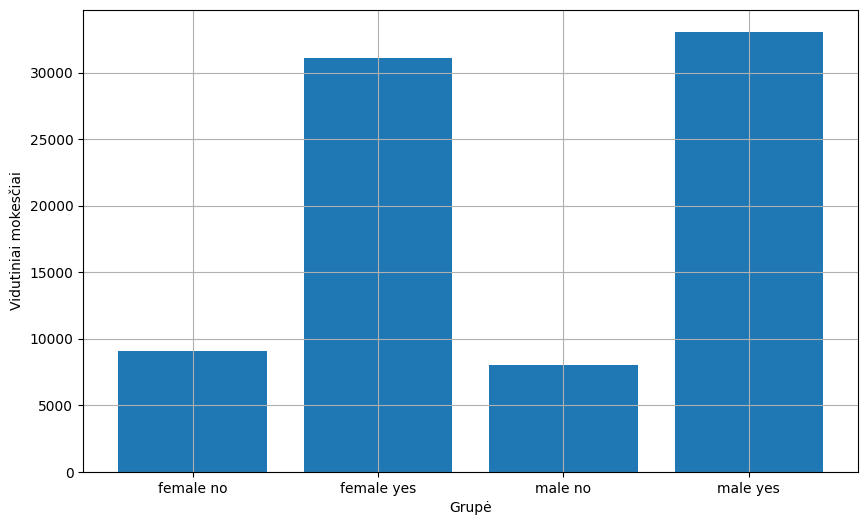

In [33]:
# Smoker
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()


# SQL užklausa per pandas sql_query
sql_child = """SELECT sex, smoker, avg(charges) as charges FROM InsuranceUSA7cols
group by sex, smoker;"""
df1 = pd.read_sql_query(sql_child, con=DB)


# Sukuriame naują stulpelį, kad sujungtume lytį ir rūkymo statusą
df1['group'] = df1['sex'] + " " + df1['smoker']

print(df1)

# Vizualizacija: Stulpelinė diagrama lyčių, rūkymo statuso ir vidutinių mokesčių santykiui
plt.figure(figsize=(10, 6))
plt.bar(df1['group'], df1['charges'])  # Spalvos skirtingoms grupėms
plt.xlabel('Grupė')
plt.ylabel('Vidutiniai mokesčiai')
plt.grid(True)
plt.show()

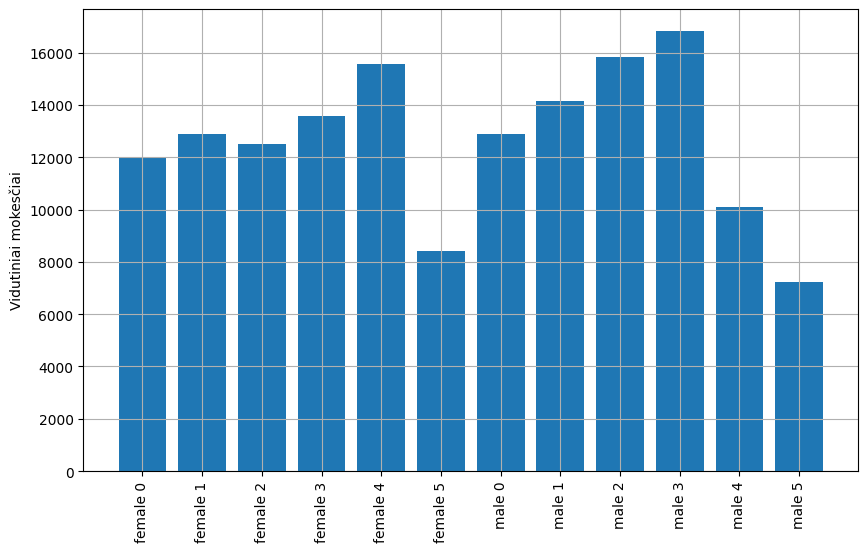

In [41]:
# Children
# Prisijungimas prie MySQL
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

# SQL užklausa per pandas sql_query
sql_child = """SELECT sex, children, AVG(charges) AS average_charges FROM InsuranceUSA7cols GROUP BY sex, children;"""
df1 = pd.read_sql_query(sql_child, con=DB)



df1['group'] = df1['sex'] + " " + df1['children'].astype(str)

# Vizualizacija: Stulpelinė diagrama lyčių ir vaikų skaičiaus įtakos vidutiniams mokesčiams
plt.figure(figsize=(10, 6))
plt.bar(df1['group'], df1['average_charges'])  # Naudokite vieną spalvą, arba priskirkite spalvas pagal poreikį
plt.ylabel('Vidutiniai mokesčiai')
plt.xticks(rotation=90)  # Sukame ašies etiketes, kad būtų lengviau skaityti
plt.grid(True)
plt.show()

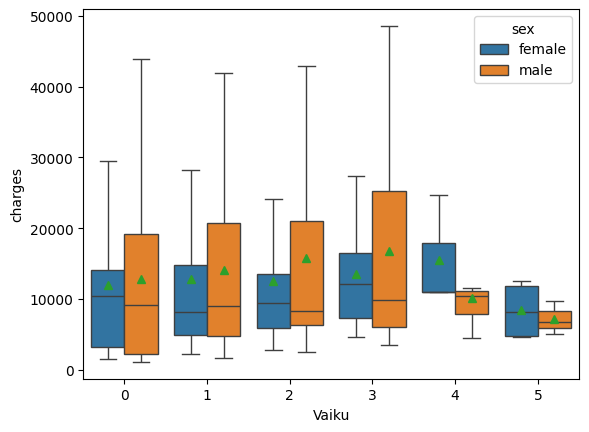

In [48]:
#seaborn (Matplotlib alternatyva)
# Prisijungimas prie MySQL
DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

# SQL užklausa per pandas sql_query
sql_child = """SELECT * FROM InsuranceUSA7cols;"""
df1 = pd.read_sql_query(sql_child, con=DB)


ax = sns.boxplot(data=df1, x='children', y='charges', showmeans = True, showfliers = False, hue='sex')
ax.set_xlabel('Vaiku')                                              # hue - nubraizo atskirus boxplotus 
plt.show()



<Axes: xlabel='age', ylabel='charges'>

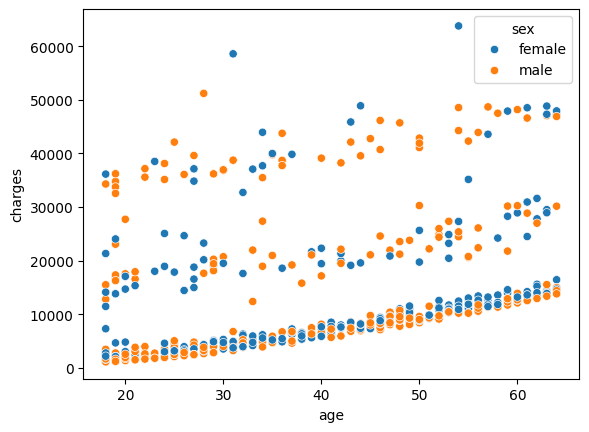

In [50]:
sns.scatterplot(data=df1, x='age', y='charges', hue='sex')

<Axes: xlabel='sex,smoker'>

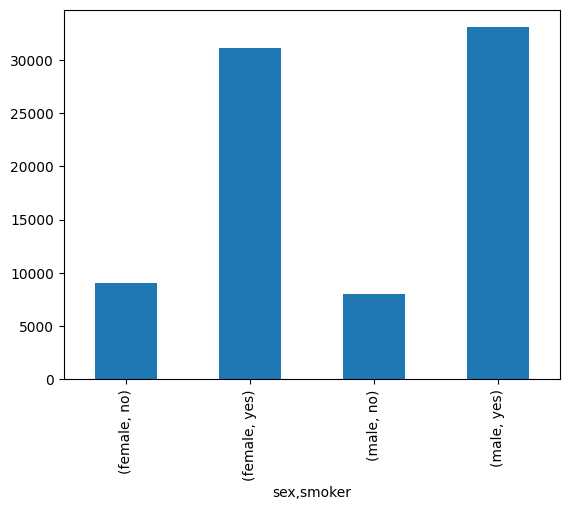

In [53]:
#pandas group by , unstack() ir braizymas 

df1.groupby(['sex','smoker'])['charges'].mean().plot(kind='bar')      #stacked table 



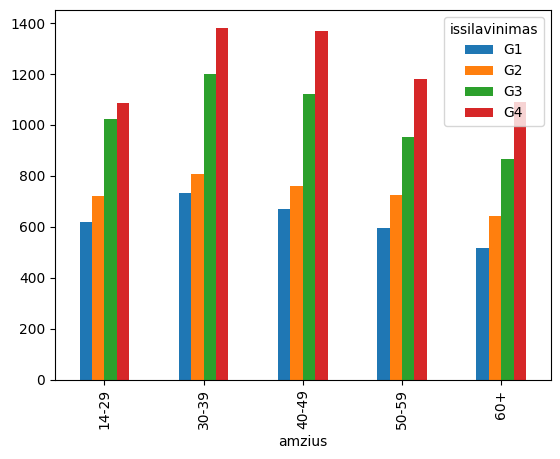

In [69]:
# dus2018.csv:
# parodykite vidutinio atlyginimo priklausomybę nuo išsilavinimo ir amžiaus grupės (bar, vienas grafikas)




DB = cnt.connect(
    host='88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C = DB.cursor()

# SQL užklausa per pandas sql_query
sql_child = """select amzius, issilavinimas, avg(bdu_spalio) as atlyg from DUS2018N
group by amzius, issilavinimas;"""
df1 = pd.read_sql_query(sql_child, con=DB)


df1.groupby(['amzius','issilavinimas'])['atlyg'].mean().unstack().plot(kind='bar')   #unstack pvz                                       # hue - nubraizo atskirus boxplotus 
plt.show()

In [70]:
# SQL Lite 

#Prisijungimas 
SDB = sqlite3.connect('Testas.db')
Cs = SDB.cursor()                    #Prisijungeme prie duomenu bazes. Jei neegzistuoja, sukuriama nauja duomenu baze 




In [74]:
SDB = sqlite3.connect('../../DATA/sqlData.db')
Cs = SDB.cursor()                   

In [76]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select issilavinimas, amzius from DUS2018N"""
C.execute(sql)
ans = C.fetchall()
edu, age = list(map(list, zip(*ans)))
#? = np.transpose(ans)
print(edu)

['G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G3', 'G4', 'G4', 'G3', 'G3', 'G4', 'G3', 'G3', 'G4', 'G4', 'G4', 'G4', 'G4', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G4', 'G2', 'G2', 'G2', 'G4', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G4', 'G2', 'G2', 'G3', 'G4', 'G2', 'G2', 'G3', 'G2', 'G2', 'G3', 'G4', 'G4', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G4', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G4', 'G2', 'G2', 'G3', 'G1', 'G2', 'G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G3', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G2', 'G4', 'G3', 'G2', 'G2', 'G2', 'G4', 'G2', 'G4', 'G2', 'G3', 'G3', 'G3', 'G4', 'G3', 'G4', 'G4', 'G4', 'G2', 'G4', 'G3', 'G4', 'G4', 'G4', 'G4', 'G4', 'G2', 'G2', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G3', 'G2', 'G2', 'G2', 'G2', 'G4', 'G2', 'G2', 'G2', 'G2', 'G3

In [78]:
sql = '''create table T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
);
'''
Cs.execute(sql)

In [82]:
sql_template = '''insert into T1 values (?,?,?,?)'''

data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)    #nurodome kad irasytu duomenis 



In [83]:
SDB.commit()   #uzkomitina i lentele irasomus duomenis 

In [87]:
#Visi zingsniai su nauja lentele 

SDB = sqlite3.connect('Testas.db') # jei neegsiztuoja - bus sukurfta nauja sqlite DB
Cs = SDB.cursor()

sql = '''create table if not exists T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

Cs.execute(sql_template, ('T1','F1', 10, 1024))

SDB.commit() # commit() būtinas, jei norite įrašyti duoenis į DB

SDB.close()



In [85]:
SDB.close()